/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

model              AdaBoostClassifier  ExtraTreesClassifier  \
scoring  cv_cycle                                             
accuracy 1                   0.583333              0.666667   
         2                   0.583333              0.916667   
         3                   0.833333              0.916667   
         4                   0.750000              0.833333   
         5                   0.833333              1.000000   
...                               ...                   ...   
roc_auc  24                  0.722222              0.861111   
         25                  1.000000              0.944444   
         mean                0.828000              0.899000   
         median              0.861000              0.917000   
         std                 0.138000              0.077000   

model              KNeighborsClassifier  LogisticRegression       SVC  
scoring  cv_cycle                                                      
accuracy 1                     0.666667            0.500000  0.750000  
         2                     0.833333            0.666667  0.750000  
         3                     0.916667            0.666667  0.833333  
         4                     0.750000            0.750000  0.750000  
         5                     0.666667            0.833333  1.000000  
...                                 ...                 ...       ...  
roc_auc  24                    0.861111            0.888889  0.944444  
         25                    0.819444            0.666667  0.944444  
         mean                  0.864000            0.764000  0.931000  
         median                0.861000            0.806000  0.944000  
         std                   0.083000            0.121000  0.067000  

[224 rows x 5 columns]

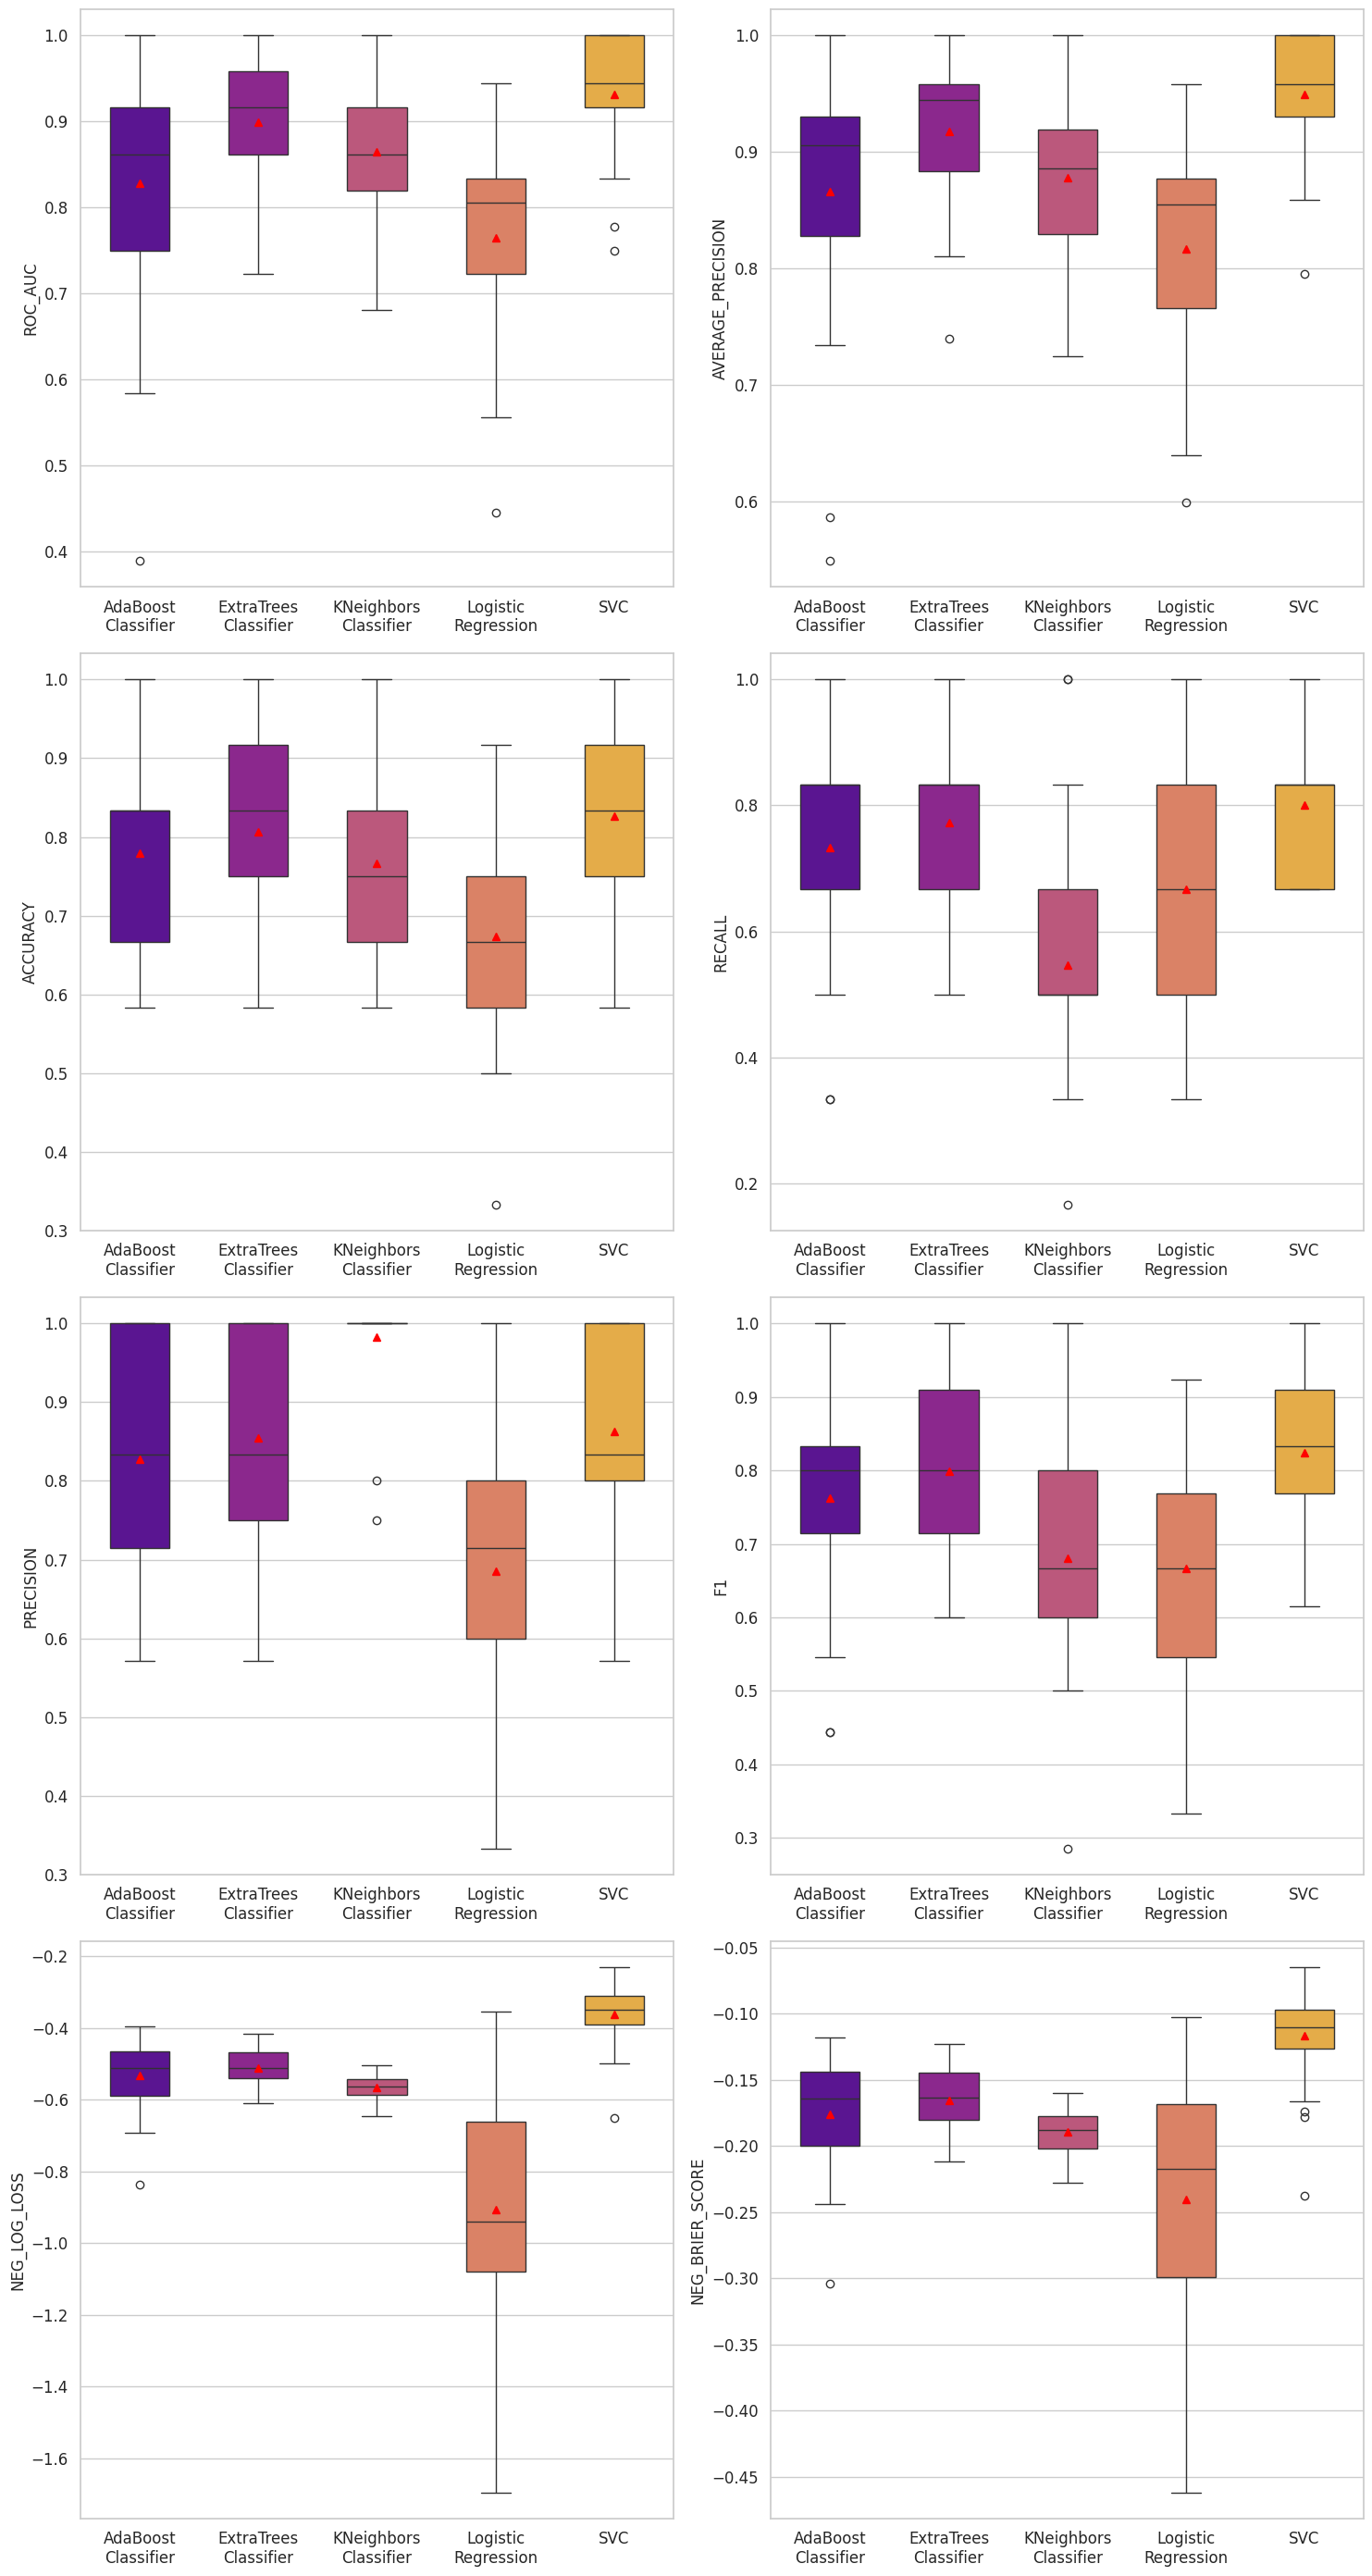

In [1]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import ModelValidation
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic classification data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data


scoring_list = [
            "roc_auc",
            "average_precision",
            "accuracy",
            "recall",
            "precision",
            "f1",
            "neg_log_loss",
            "neg_brier_score",
        ]
select_model = ["LogisticRegression", "KNeighborsClassifier", "SVC", "ExtraTreesClassifier", "AdaBoostClassifier"]

class_data = create_classification_data()
cv_result = ModelValidation.cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    scoring_list=scoring_list,
    select_model=select_model,
    visualize="box",
    save_csv=True)

from IPython.display import display
display(cv_result)


/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

model              AdaBoostClassifier  ExtraTreesClassifier  \
scoring  cv_cycle                                             
accuracy 1                   0.583333              0.666667   
         2                   0.583333              0.916667   
         3                   0.833333              0.916667   
         4                   0.750000              0.833333   
         5                   0.833333              1.000000   
...                               ...                   ...   
roc_auc  24                  0.722222              0.861111   
         25                  1.000000              0.944444   
         mean                0.828000              0.899000   
         median              0.861000              0.917000   
         std                 0.138000              0.077000   

model              KNeighborsClassifier  LogisticRegression       SVC  
scoring  cv_cycle                                                      
accuracy 1                     0.666667            0.500000  0.750000  
         2                     0.833333            0.666667  0.750000  
         3                     0.916667            0.666667  0.833333  
         4                     0.750000            0.750000  0.750000  
         5                     0.666667            0.833333  1.000000  
...                                 ...                 ...       ...  
roc_auc  24                    0.861111            0.888889  0.944444  
         25                    0.819444            0.666667  0.944444  
         mean                  0.864000            0.764000  0.931000  
         median                0.861000            0.806000  0.944000  
         std                   0.083000            0.121000  0.067000  

[224 rows x 5 columns]

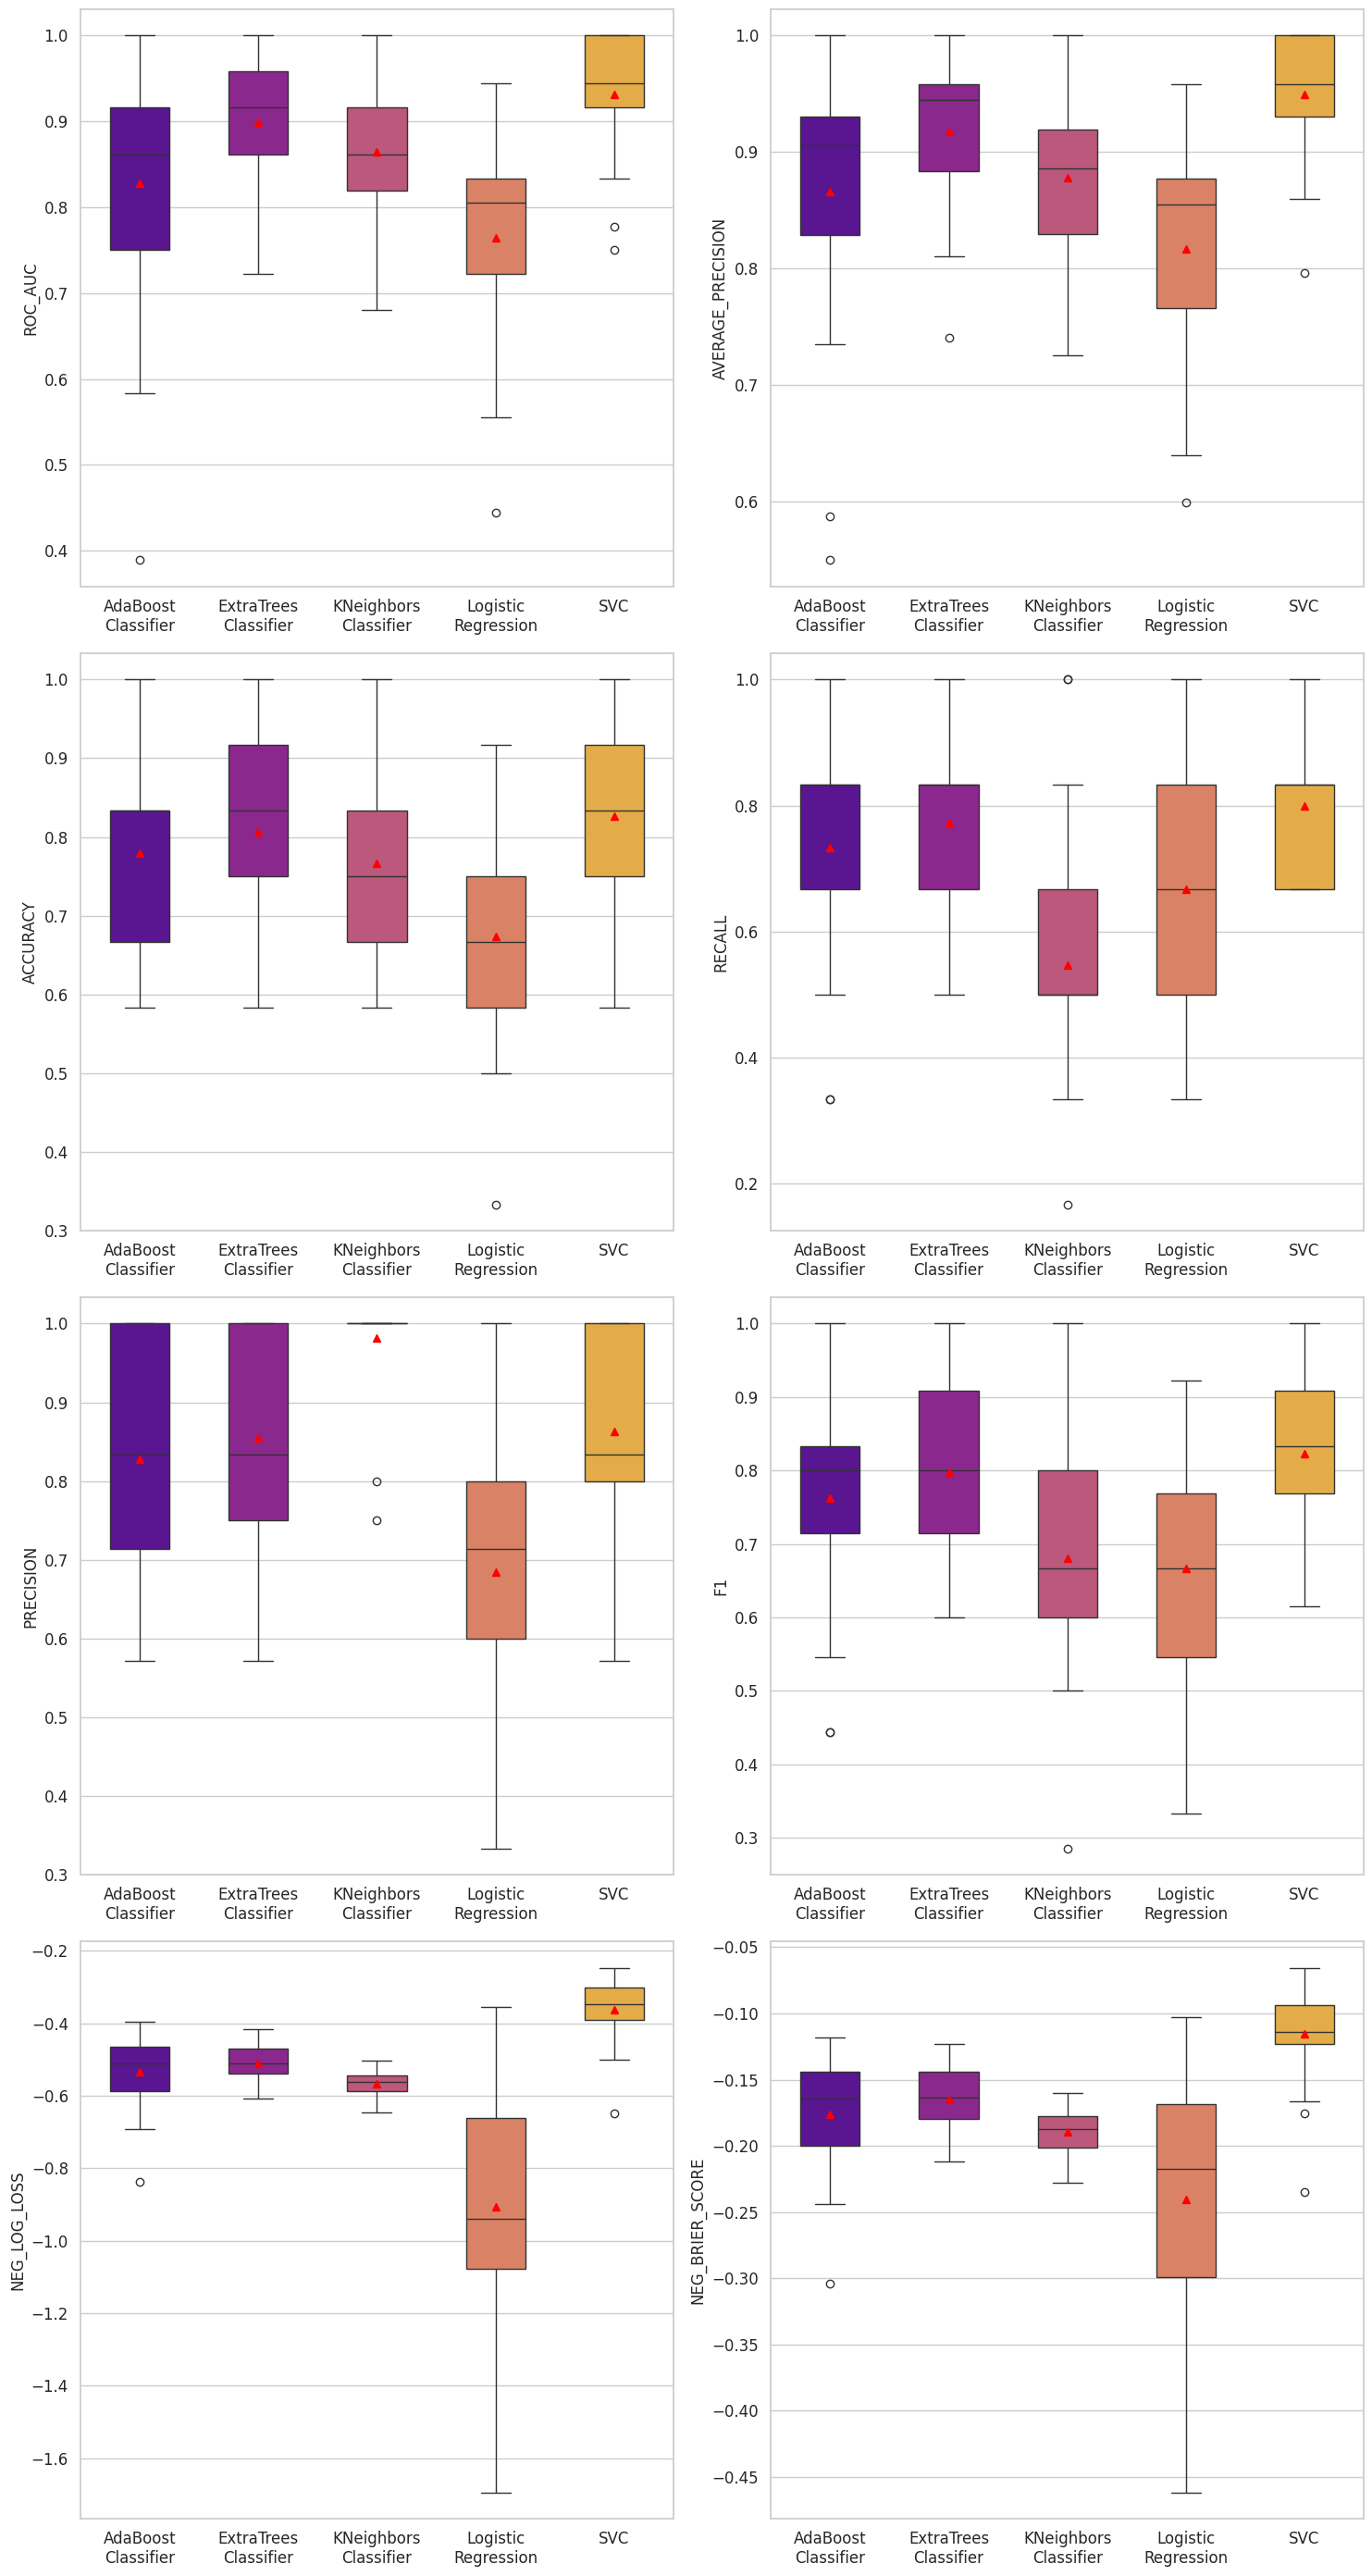

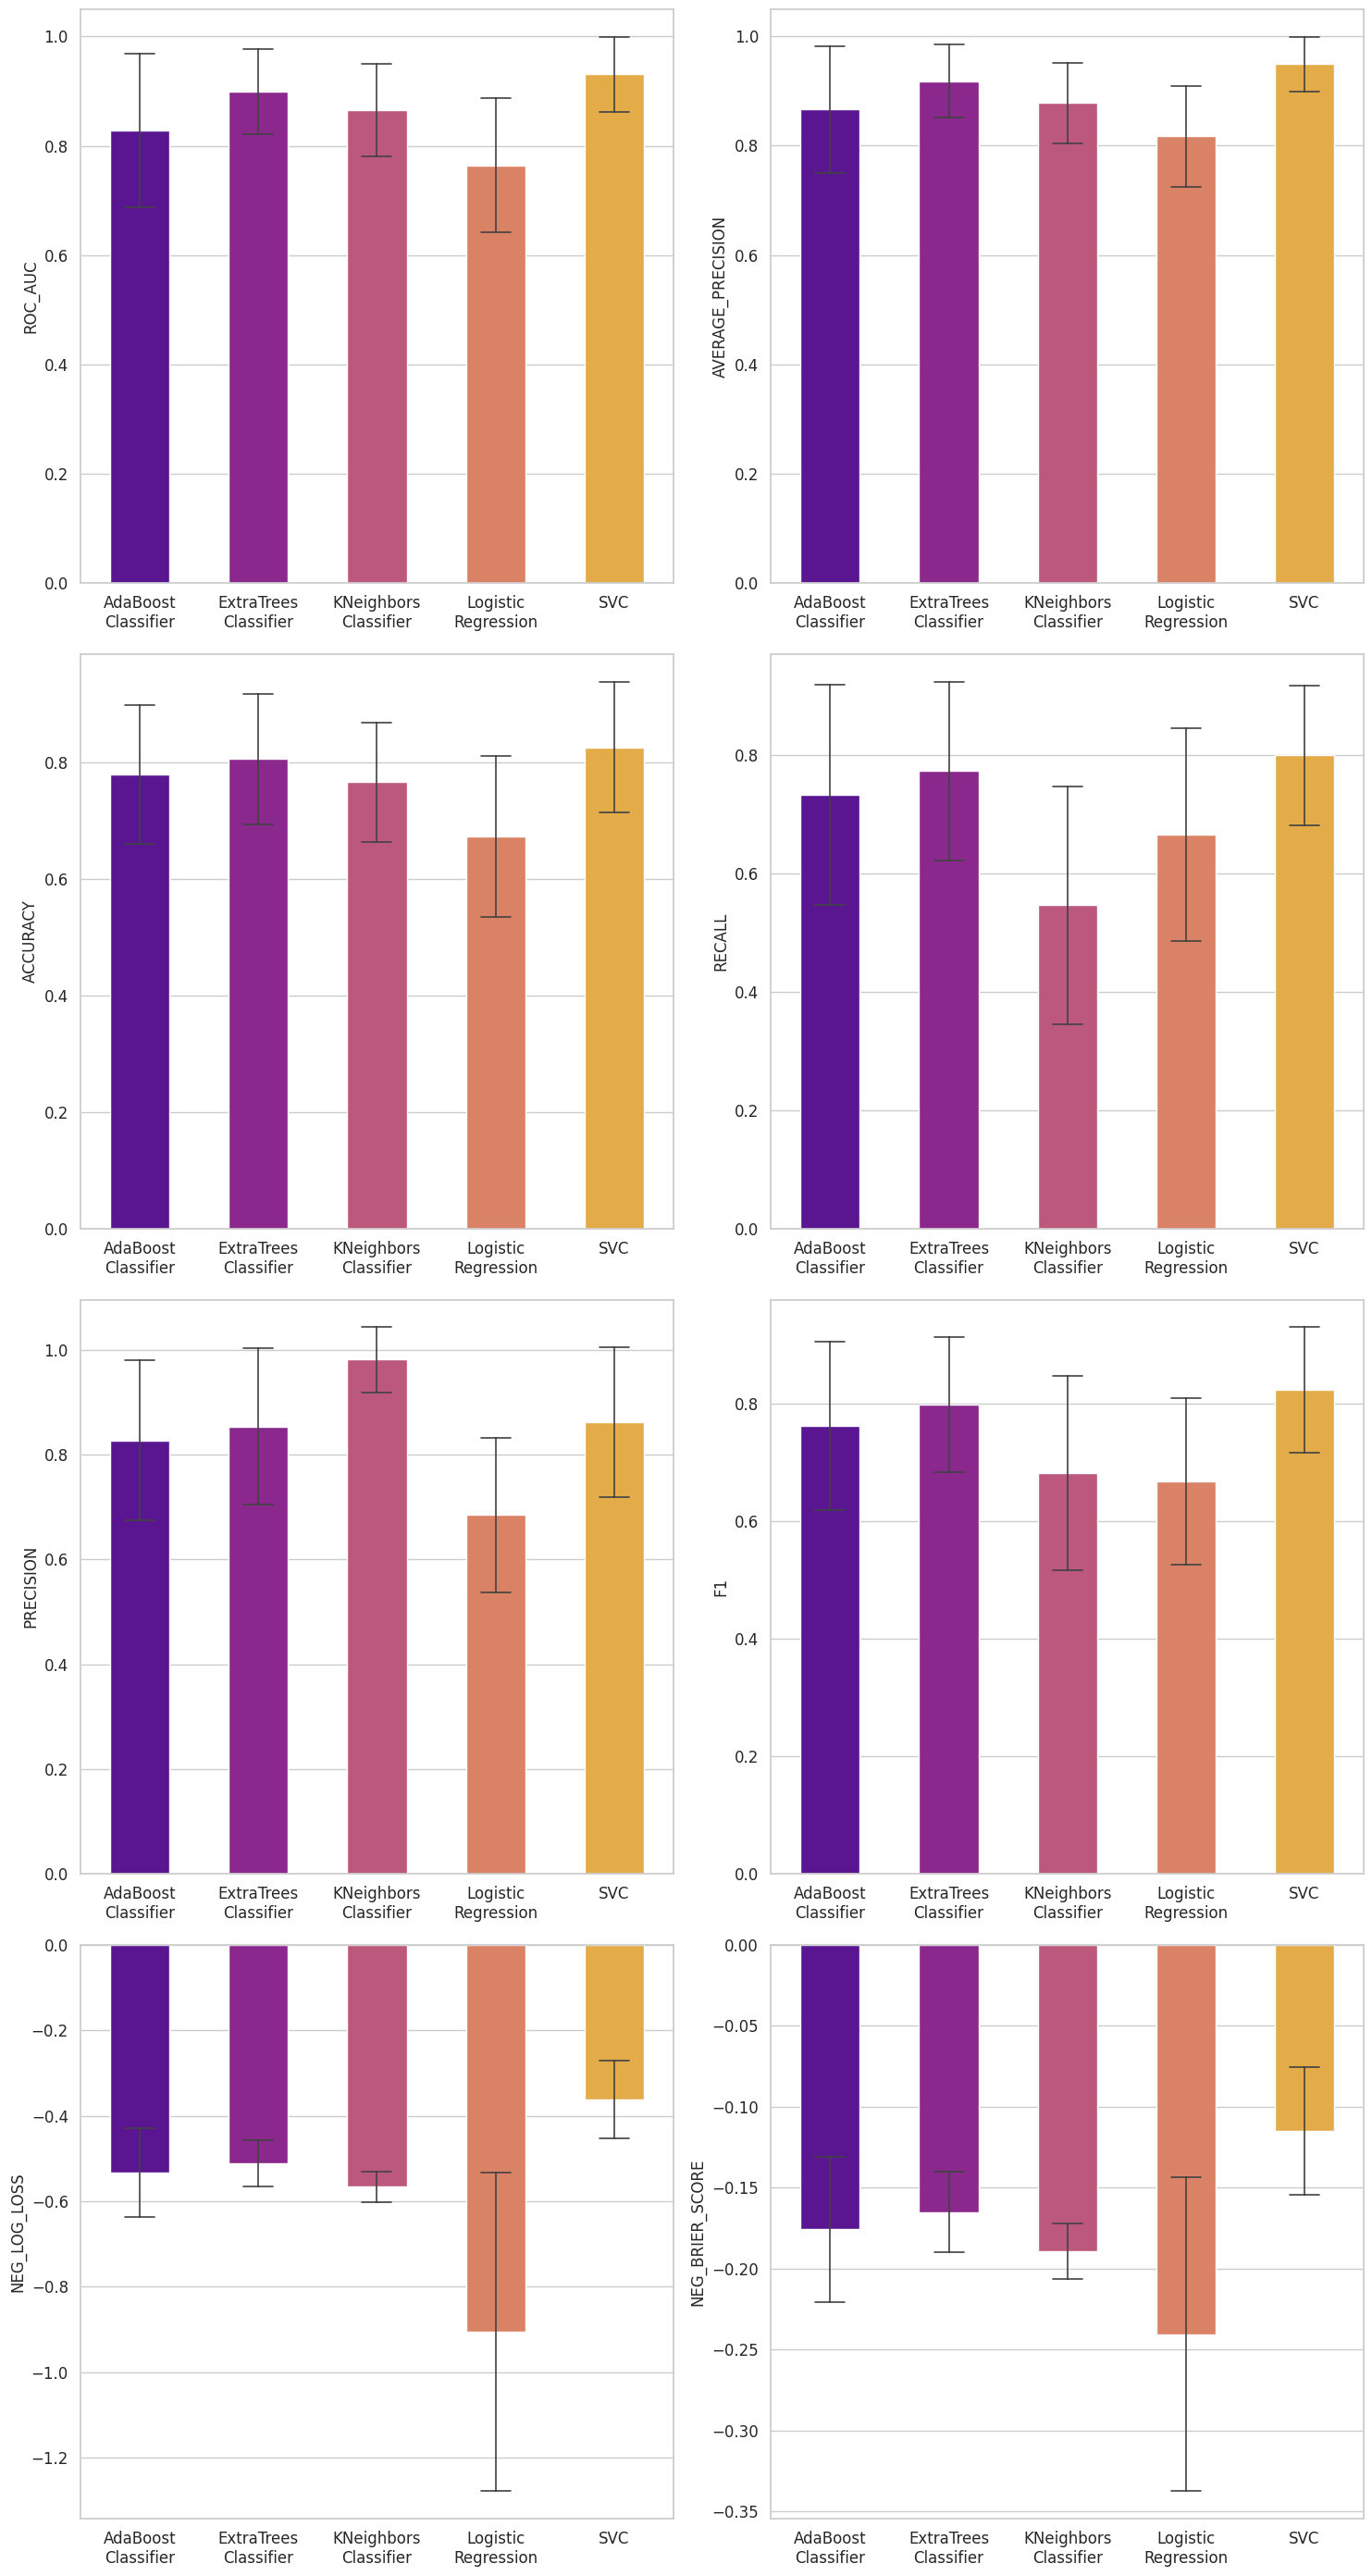

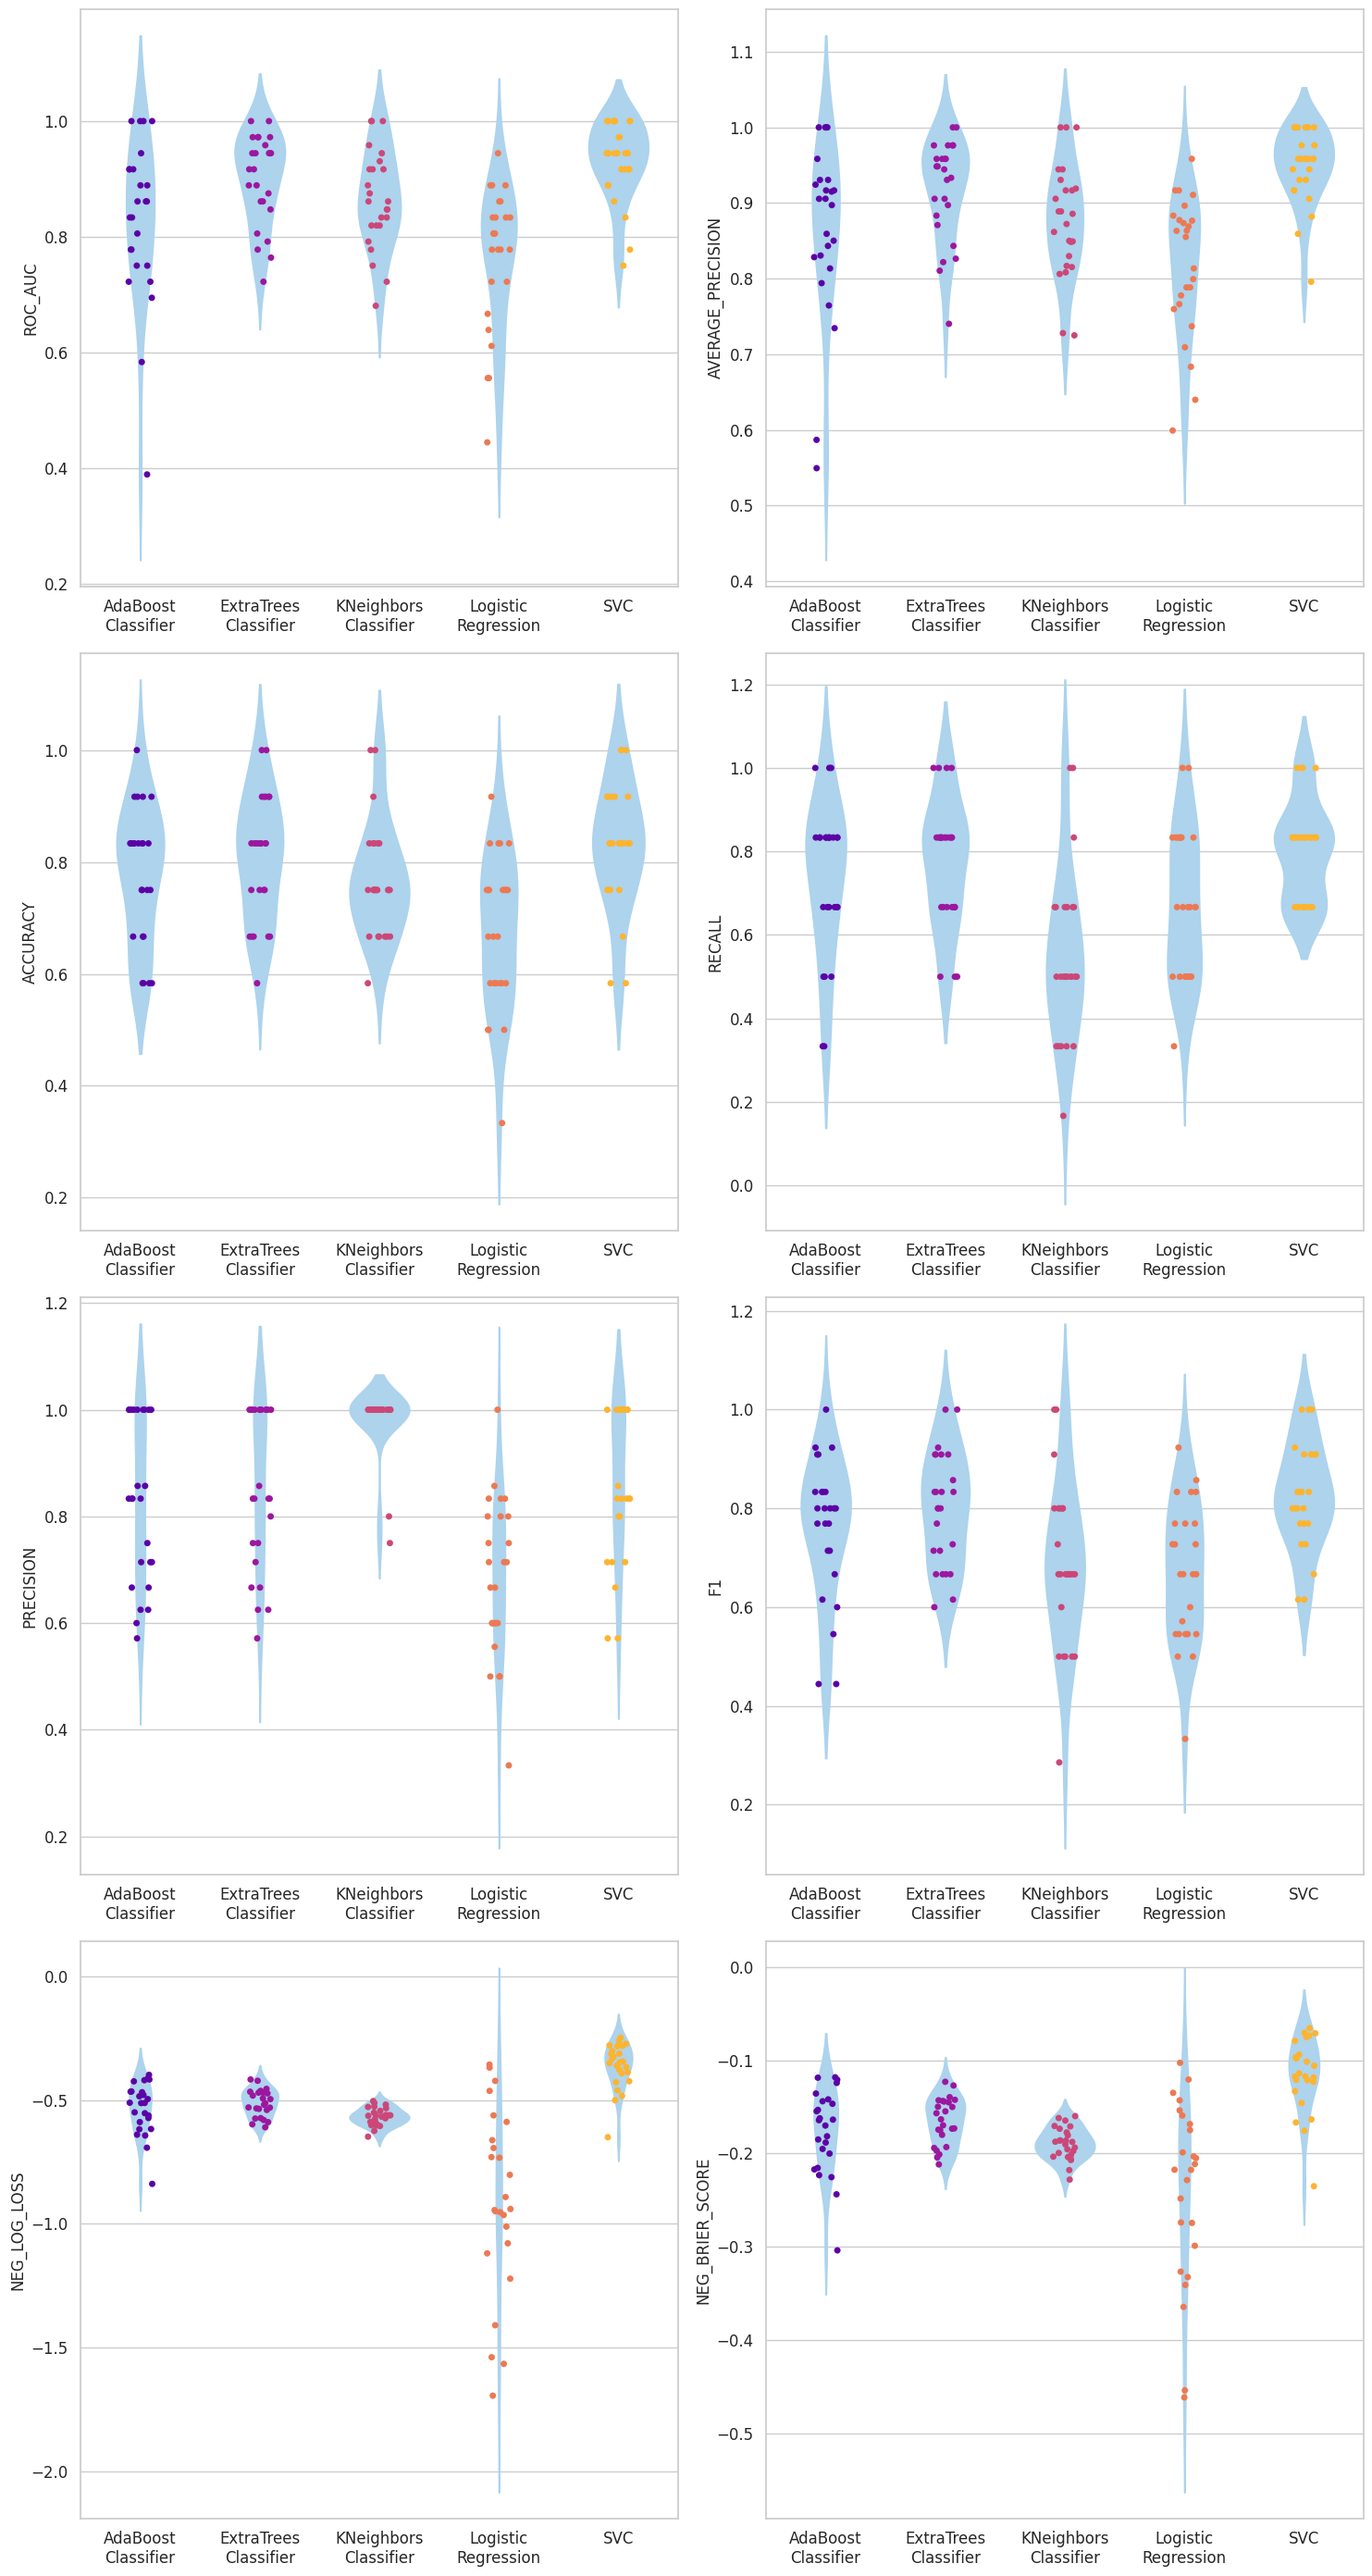

In [2]:
cv_result2 = ModelValidation.cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    scoring_list=scoring_list,
    select_model=select_model,
    visualize=["box", "bar", "violin"],
    save_csv=False,
    save_fig=True,
    fig_prefix="test")

from IPython.display import display
display(cv_result2)